In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import preprocessing

In [3]:
cebuano_dataset = pd.read_csv('/content/drive/MyDrive/Cebuano Dataset/v2/Cebuano_SYLL_Features_v2.csv')

In [4]:
print('Shape of Features', cebuano_dataset.shape)
cebuano_dataset.head(5)

Shape of Features (284, 9)


,book_title,consonant_cluster_density,v_density,cv_density,vc_density,cvc_density,ccv_density,ccvc_density,label
0,1 Ang mga Prutas Gisuwat ni: Elvira J. Buot ...,0.410714,1.714286,1.267857,1.250000,0.571429,0.267857,0.178571,1
1,1 Ang Monyeka Gisuwat ni: Milagros Meca ...,0.303571,2.196429,1.696429,1.553571,0.821429,0.160714,0.125000,1
2,1 Ang Ok-ok Gisuwat ni: Juna J. Presbite...,0.342857,1.628571,1.171429,1.057143,0.485714,0.200000,0.085714,1
3,1 Ang Panimalay Gisuwat ni: Cecilia Y. W...,0.400000,2.353846,1.876923,1.892308,1.030769,0.261538,0.200000,1
4,1 Ang Pati ni Pipo Sinulat nila ni: Rosemarie ...,0.304762,1.733333,1.266667,1.085714,0.476190,0.209524,0.114286,1


In [5]:
c = cebuano_dataset['label']
X = cebuano_dataset.drop('label', axis=1)
X = X.drop('book_title', axis=1)

X.head()

,consonant_cluster_density,v_density,cv_density,vc_density,cvc_density,ccv_density,ccvc_density
0,0.410714,1.714286,1.267857,1.250000,0.571429,0.267857,0.178571
1,0.303571,2.196429,1.696429,1.553571,0.821429,0.160714,0.125000
2,0.342857,1.628571,1.171429,1.057143,0.485714,0.200000,0.085714
3,0.400000,2.353846,1.876923,1.892308,1.030769,0.261538,0.200000
4,0.304762,1.733333,1.266667,1.085714,0.476190,0.209524,0.114286


## Training and Testing Sets

In [6]:
from sklearn.model_selection import train_test_split
X = cebuano_dataset[['consonant_cluster_density','v_density','cv_density','vc_density','cvc_density','ccv_density','ccvc_density']]
y = cebuano_dataset[['label']] 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_features='auto',max_depth=20)
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=20)

In [9]:
y_pred=clf.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=3))

[[10  6  6]
 [ 4 12  5]
 [ 0  5  9]]
              precision    recall  f1-score   support

           1      0.714     0.455     0.556        22
           2      0.522     0.571     0.545        21
           3      0.450     0.643     0.529        14

    accuracy                          0.544        57
   macro avg      0.562     0.556     0.543        57
weighted avg      0.578     0.544     0.545        57



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


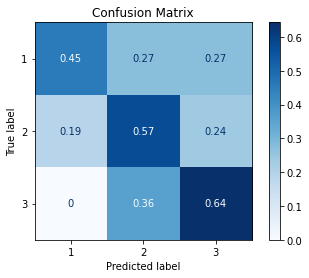

In [11]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
# plt.title('Confusion Matrix')
# plt.show(matrix)
# plt.show()

plt.tight_layout()
plt.savefig("Matrix_SYLL_RF.pdf", dpi=120, format='pdf')

## Random Forest Hyperparmeter Tuning using GridSearchCV

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

rfc_model= RandomForestClassifier()

parameters = {'n_estimators': [10,100,1000], 
              'max_features': [6,32,'auto'], 
              'max_depth': [10,20,40],
              'criterion' :['gini', 'entropy']
             }

grid_search = GridSearchCV(RandomForestClassifier(), parameters, scoring= 'accuracy', refit = 'True', cv = 5)
grid_search = grid_search.fit(X_train, y_train)

print("Best parameters:")
print(grid_search.best_params_)
rfc_best_params_= grid_search.best_params_

rfc_model.set_params(**grid_search.best_params_)
rfc_model.fit(X_train, y_train)

predictions = rfc_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Best parameters:
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 1000}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [13]:
grid_search = grid_search.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, grid_search, digits=3))

[[10  6  6]
 [ 4 12  5]
 [ 0  5  9]]
              precision    recall  f1-score   support

           1      0.833     0.455     0.588        22
           2      0.500     0.524     0.512        21
           3      0.435     0.714     0.541        14

    accuracy                          0.544        57
   macro avg      0.589     0.564     0.547        57
weighted avg      0.613     0.544     0.548        57



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


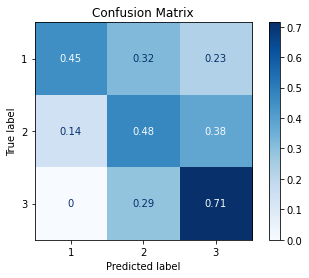

In [14]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(rfc_model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
# plt.title('Confusion Matrix')
# plt.show(matrix)
# plt.show()

plt.tight_layout()
plt.savefig("Matrix_SYLL_RF_GridSearch.pdf", dpi=120, format='pdf')